In [1]:
import seaborn as sns
from scipy import stats
from statistics import NormalDist
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os
import time
import numpy as np
import torch

In [3]:
#export
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
#! pip install dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter


In [ ]:
! pip install plotly

In [5]:
import plotly.express as px

In [6]:
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('CPU')
physical_devices = tf.config.list_physical_devices('GPU')

In [7]:
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cuda', index=0)

In [8]:
%matplotlib inline

# Data Upload

In [9]:
pd_combined_models_filtered_global= pd.read_csv('/workspaces/CodeSyntaxConcept/data/ds_processed_logits_global/out_astevalverticalfiltered_global_filtered_bts.csv', index_col=0)  

In [45]:
pd_combined_models_filtered_global.head(5)

,ast_element,node_type,concept_median_prob,concept_min_prob,concept_max_prob,model,id,type_model,size_model,median_bootstrap,median_standard_error,category
4,],leaf,"[0.5011640191078186, 0.4131472706794739, 0.199...","[0.5011640191078186, 0.4131472706794739, 0.199...","[0.5011640191078186, 0.4131472706794739, 0.199...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.519970,0.002649,Scope
20,},leaf,"[0.054765164852142334, 0.2852576673030853, 0.1...","[0.054765164852142334, 0.2852576673030853, 0.1...","[0.054765164852142334, 0.2852576673030853, 0.1...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.407857,0.004083,Scope
26,comparison_operator,parent,"[0.17771987480146992, 0.6588097332666317, 0.35...","[0.007373981905402616, 0.520501870661974, 0.16...","[0.41078073443430996, 0.8648846993843714, 0.51...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.520790,0.001535,Operator
28,list_comprehension,parent,"[0.3324718966941873, 0.8159117991703398, 0.246...","[0.20159477380697022, 0.7707708460636502, 0.03...","[0.5388806954195554, 0.8741763405445288, 0.548...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.539435,0.004008,Functional Programming
34,identifier,leaf,"[0.10797689084947706, 0.20358978114866963, 0.0...","[0.0017664427507043002, 0.0009960447205230594,...","[0.25789262652397155, 0.5796611309051514, 0.01...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.379062,0.000711,Natural Language


# Agreggated 

### Quick Summary

In [13]:
#Quick Summary
pd_combined_models_filtered_global.groupby(['type_model','id']).describe()

median_bootstrap                                \
                                        count      mean       std       min   
type_model id                                                                 
codegen-nl codegen-nl [2B]               32.0  0.646723  0.154739  0.252606   
           codegen-nl [350M]             32.0  0.549319  0.171546  0.137299   
gpt-3      gpt-3 [1.3B]                  32.0  0.592519  0.161045  0.180514   
           gpt-3 [125M]                  32.0  0.481038  0.172751  0.075211   
           gpt-3 [2.7B]                  32.0  0.623586  0.159371  0.241559   
mono-lang  mono-lang [1.5B]              32.0  0.714723  0.134081  0.331514   
           mono-lang [110M]              32.0  0.613885  0.154761  0.221256   
           mono-lang [2B]                32.0  0.841882  0.098313  0.496378   
           mono-lang [350M]              32.0  0.727566  0.136148  0.308505   
multi-lang multi-lang [110M]             32.0  0.574428  0.162936  0.203202   
           multi-lang [2B]               32.0  0.785699  0.121521  0.366043   
           multi-lang [350M]             32.0  0.681593  0.151625  0.254662   

                                                                      \
                                   25%       50%       75%       max   
type_model id                                                          
codegen-nl codegen-nl [2B]    0.577375  0.646138  0.784025  0.910404   
           codegen-nl [350M]  0.484966  0.554837  0.657631  0.784024   
gpt-3      gpt-3 [1.3B]       0.531882  0.593474  0.700005  0.822950   
           gpt-3 [125M]       0.406782  0.492220  0.568160  0.758612   
           gpt-3 [2.7B]       0.557982  0.625026  0.753314  0.907840   
mono-lang  mono-lang [1.5B]   0.666210  0.697792  0.745167  0.997715   
           mono-lang [110M]   0.562234  0.602098  0.654079  0.993526   
           mono-lang [2B]     0.793711  0.824980  0.905215  0.996510   
           mono-lang [350M]   0.674388  0.717070  0.782298  0.992356   
multi-lang multi-lang [110M]  0.502758  0.560349  0.627100  0.992427   
           multi-lang [2B]    0.738520  0.768264  0.853066  0.996264   
           multi-lang [350M]  0.622381  0.677102  0.734869  0.990339   

                             median_standard_error                      \
                                             count      mean       std   
type_model id                                                            
codegen-nl codegen-nl [2B]                    32.0  0.004092  0.005950   
           codegen-nl [350M]                  32.0  0.003270  0.002524   
gpt-3      gpt-3 [1.3B]                       32.0  0.003521  0.003370   
           gpt-3 [125M]                       32.0  0.003417  0.002872   
           gpt-3 [2.7B]                       32.0  0.003807  0.004984   
mono-lang  mono-lang [1.5B]                   32.0  0.003570  0.003280   
           mono-lang [110M]                   32.0  0.003770  0.005060   
           mono-lang [2B]                     32.0  0.003117  0.002889   
           mono-lang [350M]                   32.0  0.003055  0.002789   
multi-lang multi-lang [110M]                  32.0  0.003677  0.004929   
           multi-lang [2B]                    32.0  0.003068  0.002749   
           multi-lang [350M]                  32.0  0.003209  0.003484   

                                                                                
                                   min       25%       50%       75%       max  
type_model id                                                                   
codegen-nl codegen-nl [2B]    0.000328  0.001544  0.002530  0.004495  0.034027  
           codegen-nl [350M]  0.000446  0.001472  0.002441  0.004249  0.010201  
gpt-3      gpt-3 [1.3B]       0.000572  0.001597  0.002413  0.003842  0.014654  
           gpt-3 [125M]       0.000704  0.001649  0.002670  0.004219  0.015722  
           gpt-3 [2.7B]       0.000483  0.001517  0.002260  0.004243  0.028127  
mon

In [ ]:
['gpt-3','codegen-nl','mono-lang','multi-lang']

In [50]:
pd_combined_models_filtered_global.groupby(['type_model','category']).describe()

median_bootstrap                      \
                                             count      mean       std   
type_model category                                                      
codegen-nl Data Structures                     8.0  0.602992  0.059776   
           Decision                            6.0  0.609295  0.147628   
           Exceptions                          8.0  0.516250  0.283320   
           Functional Programming              8.0  0.625321  0.140776   
           Iterative                           4.0  0.794309  0.027343   
           Natural Language                    6.0  0.433400  0.166084   
           Operator                            8.0  0.577881  0.067161   
           Scope                              10.0  0.710100  0.126074   
           Testing                             2.0  0.679413  0.050678   
           Types                               4.0  0.450140  0.126046   
gpt-3      Data Structures                    12.0  0.573869  0.064885   
           Decision                            9.0  0.584950  0.169425   
           Exceptions                         12.0  0.504816  0.287168   
           Functional Programming             12.0  0.589784  0.145942   
           Iterative                           6.0  0.779625  0.032853   
           Natural Language                    9.0  0.402696  0.155131   
           Operator                           12.0  0.550247  0.072377   
           Scope                              15.0  0.645247  0.141323   
           Testing                             3.0  0.652168  0.058800   
           Types                               6.0  0.413702  0.133080   
mono-lang  Data Structures                    16.0  0.678709  0.084827   
           Decision                           12.0  0.711745  0.167010   
           Exceptions                         16.0  0.791075  0.190241   
           Functional Programming             16.0  0.758166  0.112174   
           Iterative                           8.0  0.716596  0.071046   
           Natural Language                   12.0  0.584465  0.210210   
           Operator                           16.0  0.684113  0.100364   
           Scope                              20.0  0.839321  0.123998   
           Testing                             4.0  0.758379  0.066750   
           Types                               8.0  0.629698  0.150642   
multi-lang Data Structures                    12.0  0.636114  0.095444   
           Decision                            9.0  0.687015  0.156576   
           Exceptions                         12.0  0.743662  0.228834   
           Functional Programming             12.0  0.703969  0.136962   
           Iterative                           6.0  0.691080  0.076277   
           Natural Language                    9.0  0.521044  0.218630   
           Operator                           12.0  0.635111  0.099092   
           Scope                              15.0  0.814085  0.138141   
           Testing                             3.0  0.731801  0.069328   
           Types                               6.0  0.547183  0.153480   

                                                                           \
                                        min       25%       50%       75%   
type_model category                                                         
codegen-nl Data Structures         0.507995  0.574729  0.604365  0.639103   
           Decision                0.390553  0.537293  0.600195  0.718687   
           Exceptions              0.137299  0.296343  0.541435  0.782452   
           Functional Programming  0.408055  0.539892  0.618223  0.715414   
           Iterative               0.764519  0.775768  0.793829  0.812369   
           Natural Language        0.207932  0.306967  0.479797  0.550275   
           Operator                0.471235  0.534369  0.576818  0.637330   
           Scope                   0.525067  0.648487  0.696782  0.800001   
    

In [14]:
pd_combined_models_filtered_global.shape

In [15]:
mapping_concepts = {
    'for_statement': 'Iterative', #Iterative
    'while_statement': 'Iterative', #Iterative
    'return_statement': 'Scope', #Ending
    ']': 'Scope', #Ending
    ')': 'Scope', #Ending
    '}': 'Scope', #Ending
    ':': 'Scope', #Ending
    'if_statement': 'Decision', #Decision
    'elif': 'Decision',  #Decision
    'else': 'Decision',  #Decision
    'comparison_operator': 'Operator', #Operator
    'boolean_operator': 'Operator', #Operator
    'binary_operator': 'Operator', #Operator
    'unary_operator': 'Operator', #Operator
    'for_in_clause': 'Functional Programming', #Funct
    'if_clause': 'Functional Programming', #Funct
    'list_comprehension': 'Functional Programming', #Funct
    'lambda': 'Functional Programming',#Funct
    'identifier': 'Natural Language', #NL
    'string': 'Natural Language', #NL
    'comment': 'Natural Language', #NL
    'tuple': 'Data Structures', #Data
    'dictionary': 'Data Structures', #Data
    'list': 'Data Structures', #Data
    'set': 'Data Structures', #Data
    'try_statement': 'Exceptions', #Exceptions
    'except': 'Exceptions', #Exceptions
    'raise': 'Exceptions', #Exceptions
    'finally': 'Exceptions', #Exceptions
    'assert_statement': 'Testing', #Testing
    'integer': 'Types', #types
    'float': 'Types'#types
}

pd_combined_models_filtered_global['category'] = pd_combined_models_filtered_global.apply(
        lambda row : mapping_concepts[row.ast_element] , axis=1
    )

pd_combined_models_filtered_global.head(1)

,ast_element,node_type,concept_median_prob,concept_min_prob,concept_max_prob,model,id,type_model,size_model,median_bootstrap,median_standard_error,category
4,],leaf,"[0.5011640191078186, 0.4131472706794739, 0.199...","[0.5011640191078186, 0.4131472706794739, 0.199...","[0.5011640191078186, 0.4131472706794739, 0.199...",EleutherAI/gpt-neo-125m,gpt-3 [125M],gpt-3,125M,0.51997,0.002649,Scope


### Performance Bars

In [16]:
sns.set_theme(style="darkgrid")

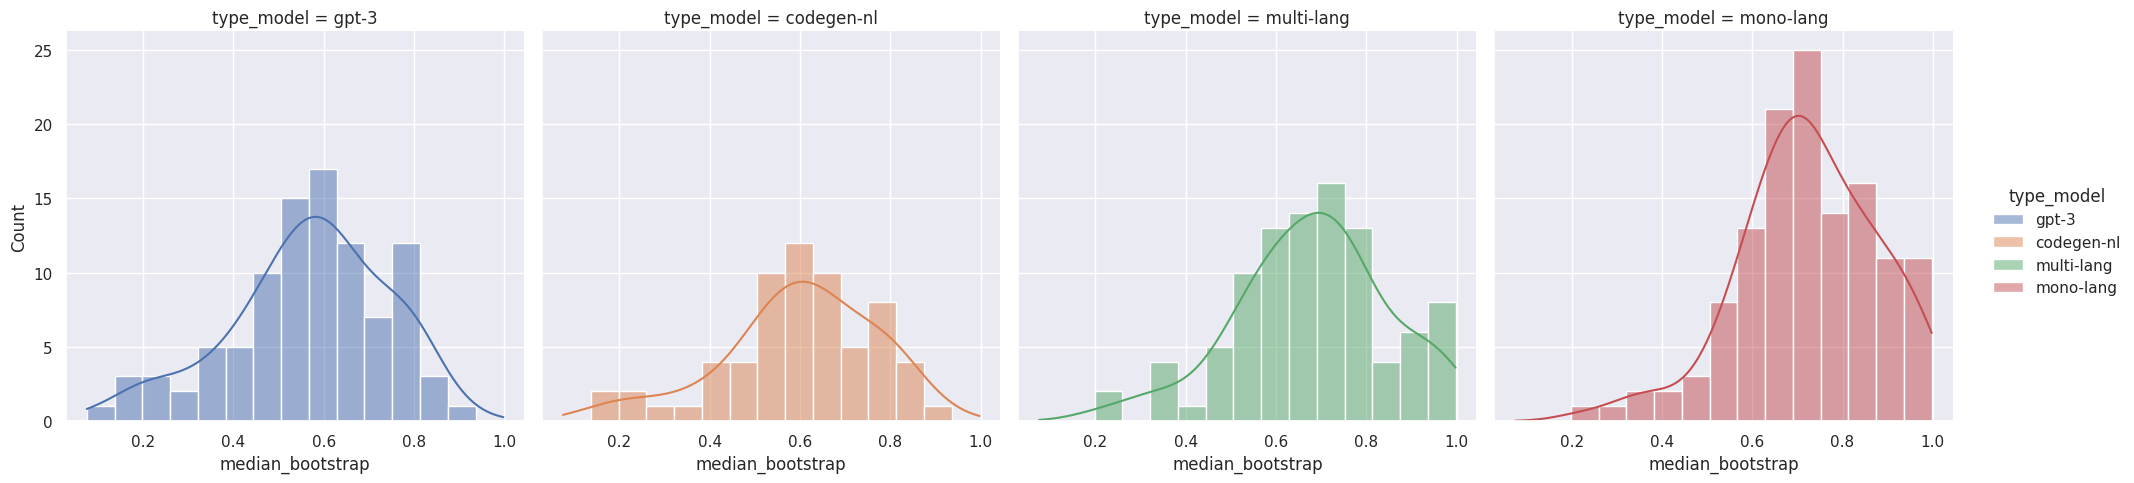

In [56]:
sns.displot(
    data=pd_combined_models_filtered_global, 
    x="median_bootstrap", 
    hue="type_model", 
    col="type_model",
    kde=True,
    kind = 'hist'
    )

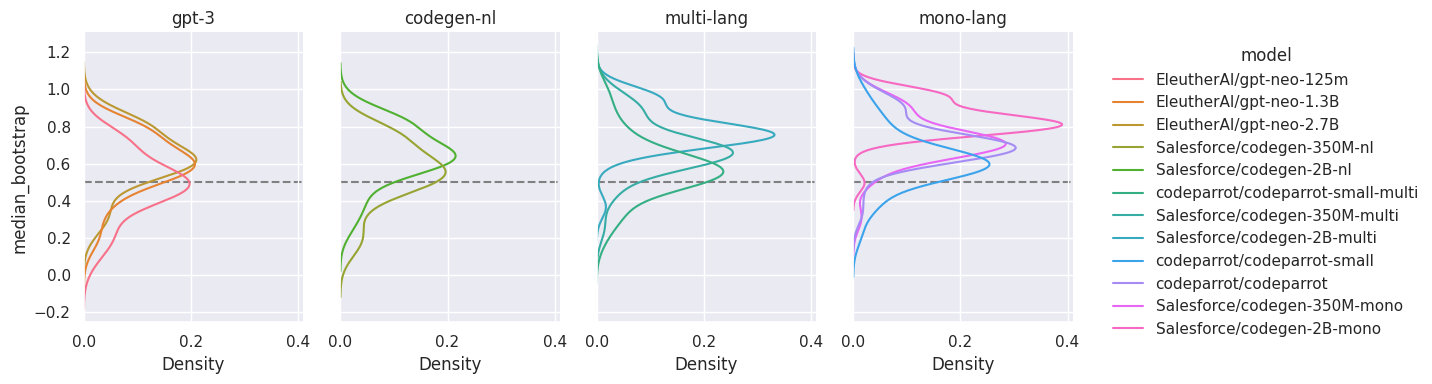

In [54]:
#Generated using: https://seaborn.pydata.org/generated/seaborn.displot.html
g = sns.displot(
    data=pd_combined_models_filtered_global, 
    y="median_bootstrap", 
    hue="model", 
    col="type_model",
    kind="kde", #ecdf
    height=4, 
    aspect=.7,
)
#g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name}")
for ax in g.axes_dict.values():
    ax.axline( (0, 0.5), slope=0, c=".5", ls="--", zorder=0 )


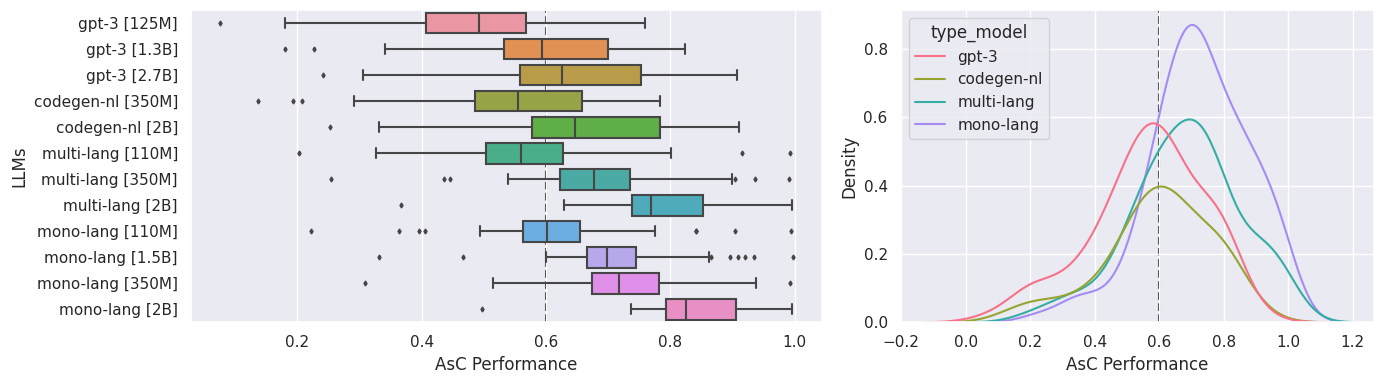

In [92]:
f, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(width_ratios=[4, 3]))
g = sns.kdeplot(
    data=pd_combined_models_filtered_global, 
    x="median_bootstrap", 
    hue="type_model", #model
    #complementary=True,
    #col="type_model",
    #kind="ecdf", #ecdf
    #height=4, 
    #aspect=.7,
    palette = 'husl',
    ax=axs[1]
)
h = sns.boxplot(
    data=pd_combined_models_filtered_global,
    x="median_bootstrap", 
    y="id", 
    fliersize = 2.5,
    #row="model",
    #kind="box", 
    orient="h",
    #legend=False, 
    #margin_titles=True,
    #height=4, 
    #aspect=3,
    ax=axs[0]
)
h.set(xlabel="AsC Performance", ylabel="LLMs")
g.set(xlabel="AsC Performance", ylabel="Density")

axs[0].axvline( 0.6, c=".2", ls="--", zorder=0, )
axs[1].axvline( 0.6, c=".2", ls="--", zorder=0, label='random threshold' )
#h.set_axis_labels("AST Performance", "LLMs")
#g.set_titles("{col_name}")
#for ax in g.axes_dict.values():
#    ax.axline( (0, 0.5), slope=0, c=".5", ls="--", zorder=0 )
    
f.tight_layout()

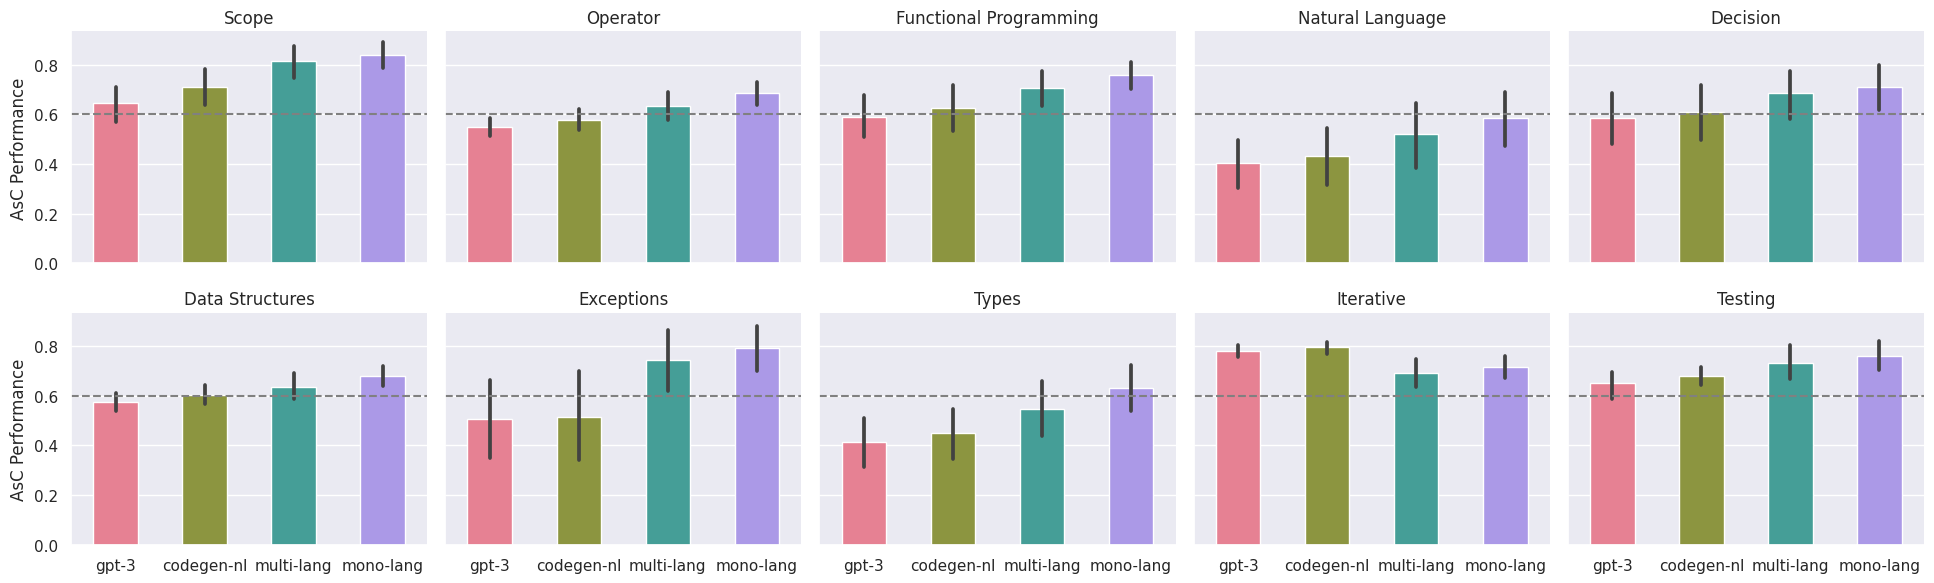

In [97]:
g = sns.FacetGrid(
    pd_combined_models_filtered_global, 
    col="category", 
    height=3, 
    aspect=1.3,
    legend_out = True,
    col_wrap=5,
    
    )
g.map(
    sns.barplot, 
    "type_model", 
    "median_bootstrap", 
    order=['gpt-3','codegen-nl','multi-lang','mono-lang'],
    palette = 'husl',
    width = 0.5
    )
g.set(xlabel="", ylabel="AsC Performance")
g.set_titles(col_template="{col_name}")
g.refline(y=0.6)


### Tree Maps

In [26]:
fig = px.sunburst(pd_combined_models_filtered_global, path=['id','category'], 
                  #values='median_bootstrap',
                  color='median_bootstrap', 
                  #hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  range_color = [0,1],
                  width = 1200,
                  height= 1200,
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
                )
fig.show()

In [28]:
#def treemap_generator( model_name ):
fig = px.treemap(pd_combined_models_filtered_global, 
                 path = [px.Constant("Large Language Models"), 'type_model', 'size_model', 'category'], 
                 #labels=['for_statement', 'while_statement'],
                 #values = 'median_bootstrap',
                 color = 'median_bootstrap', 
                 #hover_data=['iso_alpha'],
                 color_continuous_scale='RdBu',
                 width = 1800,
                 height= 600,
                 range_color = [0,1],
                 #color_continuous_midpoint=np.average(pd_combined_models_filtered_global['median_standard_error'], weights=pd_combined_models_filtered_global['median_bootstrap']),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    #fig.update_layout(margin = dict(t=50, l=15, r=15, b=15))
fig.show()

In [29]:
def treemap_generator( model_name ):
    fig = px.treemap(pd_combined_models_filtered_global[pd_combined_models_filtered_global['model']==model_name], 
                 path = [px.Constant(model_name), 'category', 'ast_element'], 
                 #labels=['for_statement', 'while_statement'],
                 #values = 'median_bootstrap',
                 color = 'median_bootstrap', 
                 #hover_data=['iso_alpha'],
                 color_continuous_scale='RdBu',
                 width = 900,
                 height= 600,
                 range_color = [0,1],
                 #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                 )
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    #fig.update_layout(margin = dict(t=50, l=15, r=15, b=15))
    fig.show()

In [44]:
treemap_generator( model_name = 'EleutherAI/gpt-neo-125m' )

In [31]:
treemap_generator( model_name = 'Salesforce/codegen-2B-mono' )

### Aggregation of Concepts

# Other Statistics

## Leaf Agreggation

In [105]:
pd_processed_logits_global[(pd_processed_logits_global['node_type']=='leaf') & (pd_processed_logits_global['model']=='125M') ][['ast_element','median_bootstrap','median_standard_error']].nlargest(30, 'median_bootstrap')

,ast_element,median_bootstrap,median_standard_error
113,^,0.982604,0.011872
74,%,0.933755,0.003862
128,as,0.924103,0.022626
88,.,0.863973,0.001717
111,in,0.826170,0.004363
164,=,0.801372,0.001738
131,:,0.788136,0.002989
103,except,0.740165,0.005830
17,import,0.723340,0.029346
92,|=,0.720718,0.131313


## Parents Aggregations

In [108]:
pd_processed_logits_global[(pd_processed_logits_global['node_type']=='parent') & (pd_processed_logits_global['model']=='125M') ][['ast_element','median_bootstrap','median_standard_error']].nlargest(30, 'median_bootstrap')

,ast_element,median_bootstrap,median_standard_error
126,import_prefix,0.969144,0.058085
79,relative_import,0.892930,0.048136
133,aliased_import,0.860397,0.074128
39,finally_clause,0.846666,0.009892
94,elif_clause,0.834726,0.003695
55,else_clause,0.827451,0.002142
18,except_clause,0.775656,0.002943
129,try_statement,0.775513,0.002269
46,while_statement,0.773447,0.004801
5,for_statement,0.756424,0.001350
